<h1>Read satellite data ndvi</h1>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 81.5 MB/s eta 0:00:00
Resolution: (0.004491576420597608, 0.004491576420597608)
Coordinate Reference System: EPSG:4326


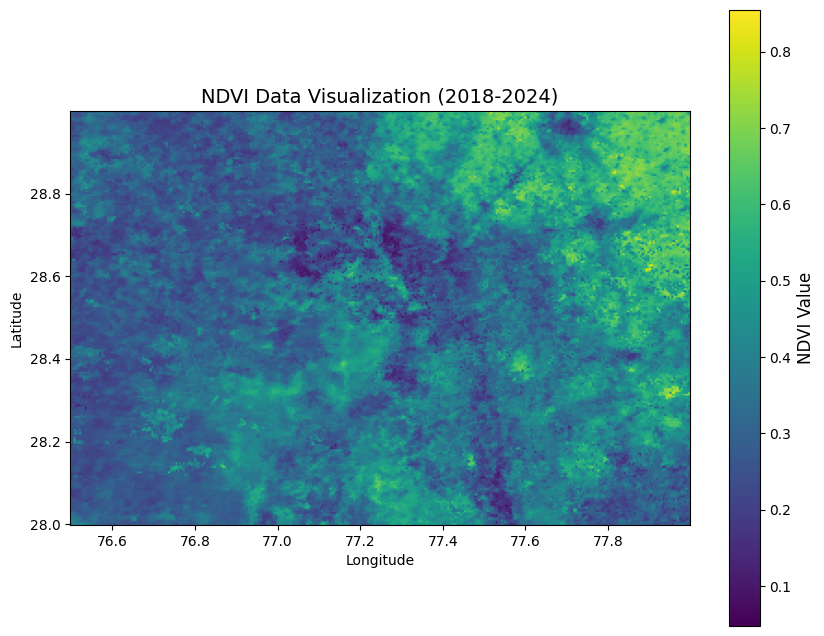

In [23]:
!pip install rasterio
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

filename = r'/content/drive/MyDrive/Data SIH1734/NDVI_MODIS_2018_2024.tif'
fid = rio.open(filename)
data = fid.read() * 0.0001
LC_type = list(fid.descriptions)

# Extract raster dimensions and coordinates
height = fid.shape[0]
width = fid.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
xs, ys = rio.transform.xy(fid.transform, rows, cols)
lons = np.array(xs)
lats = np.array(ys)

# Plotting the raster data
fig, ax = plt.subplots(figsize=(10, 8))

# Selecting the first band for visualization (modify for other bands as needed)
if len(data.shape) > 2:
    band_to_plot = data[0, :, :]
else:
    band_to_plot = data




# Open the GeoTIFF file
with rio.open(filename) as dataset:
    # Get the resolution (pixel size)
    resolution = dataset.res
    crs = dataset.crs
    print(f"Resolution: {resolution}")
    print(f"Coordinate Reference System: {crs}")

# Plot the raster data with geographical coordinates
c = ax.imshow(band_to_plot, cmap='viridis', extent=(lons.min(), lons.max(), lats.min(), lats.max()))
ax.set_title('NDVI Data Visualization (2018-2024)', fontsize=14)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a colorbar
cbar = plt.colorbar(c, ax=ax, orientation='vertical')
cbar.set_label('NDVI Value', fontsize=12)

# Show the plot
plt.show()

# Cleanup
del height, width, cols, rows, xs, ys


In [87]:
LC_type

['3_2018-07-04',
 '19_2018-07-20',
 '35_2018-08-05',
 '51_2018-08-21',
 '67_2018-09-06',
 '83_2018-09-22',
 '99_2018-10-08',
 '115_2018-10-24',
 '131_2018-11-09',
 '147_2018-11-25',
 '163_2018-12-11',
 '179_2018-12-27',
 '192_2019-01-09',
 '208_2019-01-25',
 '224_2019-02-10',
 '240_2019-02-26',
 '256_2019-03-14',
 '272_2019-03-30',
 '288_2019-04-15',
 '304_2019-05-01',
 '320_2019-05-17',
 '336_2019-06-02',
 '352_2019-06-18',
 '368_2019-07-04',
 '384_2019-07-20',
 '400_2019-08-05',
 '416_2019-08-21',
 '432_2019-09-06',
 '448_2019-09-22',
 '464_2019-10-08',
 '480_2019-10-24',
 '496_2019-11-09',
 '512_2019-11-25',
 '528_2019-12-11',
 '544_2019-12-27',
 '557_2020-01-09',
 '573_2020-01-25',
 '589_2020-02-10',
 '605_2020-02-26',
 '621_2020-03-13',
 '637_2020-03-29',
 '653_2020-04-14',
 '669_2020-04-30',
 '685_2020-05-16',
 '701_2020-06-01',
 '717_2020-06-17',
 '733_2020-07-03',
 '749_2020-07-19',
 '765_2020-08-04',
 '781_2020-08-20',
 '797_2020-09-05',
 '813_2020-09-21',
 '829_2020-10-07',
 

In [88]:
data.shape

(1, 113, 168)

In [89]:
nan_count = np.isnan(data).sum()
print(nan_count)

0


In [90]:
# prompt: i am getting 14 values which is giving nan replace this with forward and backward filling on data

import pandas as pd
import numpy as np

# Assuming 'data' is your NumPy array with NaN values
# Replace NaN values using forward and backward fill

# Convert the NumPy array to a pandas DataFrame for easier handling
df = pd.DataFrame(data.reshape(data.shape[0], -1))

# Forward fill
df.fillna(method='ffill', inplace=True)

# Backward fill (in case forward fill doesn't cover all NaNs)
df.fillna(method='bfill', inplace=True)

# Convert the DataFrame back to a NumPy array
data_filled = df.to_numpy().reshape(data.shape)

# Now 'data_filled' contains the array with NaN values replaced
# You can use data_filled for further processing or visualization

nan_count_after_fill = np.isnan(data_filled).sum()
print(f"NaN count after filling: {nan_count_after_fill}")

# Example usage: Replot with the filled data
# ... your plotting code using data_filled instead of data

NaN count after filling: 0


<ipython-input-90-2560895c387d>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-90-2560895c387d>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [91]:
df



,0,1,2,3,4,5,6,7,8,9,...,18974,18975,18976,18977,18978,18979,18980,18981,18982,18983
0,0.499379,0.50405,0.504452,0.504452,0.504452,0.504452,0.504452,0.501185,0.48781,0.48781,...,0.656113,0.656113,0.656113,0.656113,0.656113,0.656113,0.656113,0.656113,0.656113,0.656113


In [92]:
# Example array
print(f"Data shape: {data_filled.shape}")

if len(data_filled.shape) == 3:  # 3D array
    print("The data contains multiple bands.")
    for band_index in range(data_filled.shape[0]):
        print(f"Processing band {band_index + 1}...")
        # Additional band-specific processing here
elif len(data_filled.shape) == 2:  # 2D array
    print("The data contains a single band (or layer).")
    # Process the single layer directly
else:
    print("Unexpected shape! Ensure the input data is valid.")


Data shape: (1, 113, 168)
The data contains multiple bands.
Processing band 1...


Before handling:
49480 NaN values in y_train
0 Infinity values in y_train
After handling:
Shape of X_train: (60032, 3)
Shape of y_train: (60032,)


<ipython-input-99-e0a1662e564d>:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fine_no2_data[i, j] = model.predict(np.array([[ndvi_data[i, j], i, j]]))


Fine resolution NO2 data saved to: fine_resolution_no2.tif


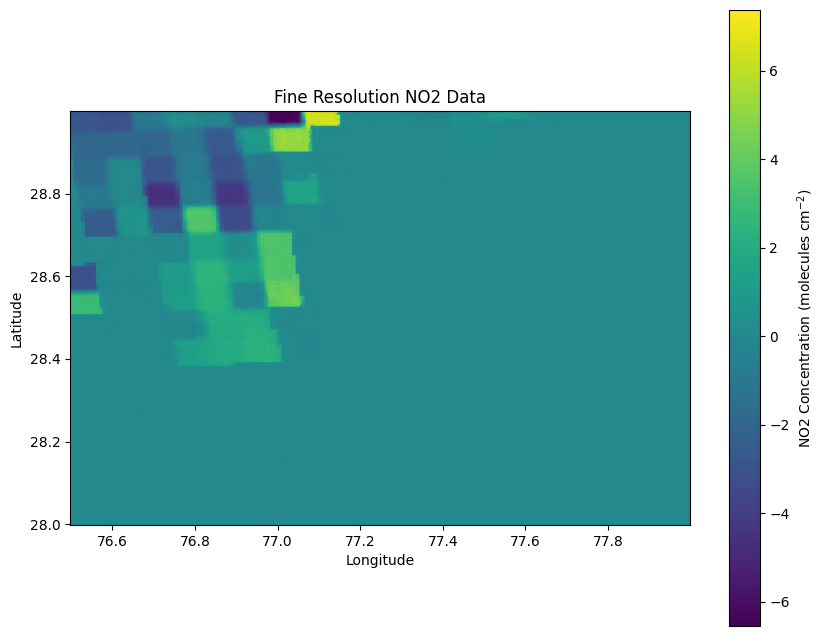

In [99]:
!pip install xgboost

import numpy as np
import pandas as pd
import rasterio
from rasterio.enums import Resampling
from rasterio.warp import reproject
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load NDVI fine resolution data (raster)
ndvi_path = r'/content/drive/MyDrive/Data SIH1734/NDVI_MODIS_2018_2024.tif'
ndvi = rasterio.open(ndvi_path)
ndvi_data = ndvi.read(1) * 0.0001

LC_type = list(ndvi.descriptions)

height = ndvi.shape[0]
width = ndvi.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
xs, ys = rasterio.transform.xy(ndvi.transform, rows, cols)
lons = np.array(xs)
lats = np.array(ys)
del(height, width, cols, rows, xs, ys)

# Load NO2 coarse resolution data (raster)
no2_path = r'/content/drive/MyDrive/Data SIH1734/Satellite_NO2_Delhi_2018_2024.tif'
coarse_no2 = rasterio.open(no2_path)
coarse_no2_data = coarse_no2.read(1) * 6.022141E19 / 1E15  # NO2 data in molecules cm^-2

date = list(coarse_no2.descriptions)

# Resample NO2 data to match NDVI resolution
no2_resampled = np.empty(ndvi_data.shape, dtype=np.float32)
reproject(
    source=coarse_no2_data,
    destination=no2_resampled,
    src_transform=coarse_no2.transform,
    src_crs=coarse_no2.crs,
    dst_transform=ndvi.transform,
    dst_crs=ndvi.crs,
    resampling=Resampling.bilinear
)

# Replace coarse_no2_data with the resampled version
coarse_no2_data = no2_resampled

# Generate a dataset for training
rows, cols = ndvi_data.shape
X = []  # Features (NDVI and spatial coordinates)
y = []  # Target (NO2 values)

for i in range(rows):
    for j in range(cols):
        X.append([ndvi_data[i, j], i, j])  # NDVI and spatial info
        y.append(coarse_no2_data[i, j])   # NO2 value

X = np.array(X)
y = np.array(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select model (e.g., XGBoost)
import numpy as np
from sklearn.preprocessing import StandardScaler

# Check for NaN or Infinity in y_train
print("Before handling:")
print(np.isnan(y_train).sum(), "NaN values in y_train")
print(np.isinf(y_train).sum(), "Infinity values in y_train")

# Handle NaN and Infinity in y_train
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train), posinf=np.nanmean(y_train), neginf=np.nanmean(y_train))

# Remove rows with invalid target values
valid_indices = ~np.isnan(y_train) & ~np.isinf(y_train)
X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

# Ensure target values are not too large (optional scaling)
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()

# Verify data integrity
print("After handling:")
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Train the XGBoost model
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

model = XGBRegressor()
model.fit(X_train, y_train)

# Predict NO2 values at fine resolution
fine_no2_data = np.zeros_like(ndvi_data, dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        fine_no2_data[i, j] = model.predict(np.array([[ndvi_data[i, j], i, j]]))

# Save the fine-resolution NO2 data as a new raster
output_path = "fine_resolution_no2.tif"
with rasterio.open(
    output_path, "w",
    driver="GTiff",
    height=fine_no2_data.shape[0],
    width=fine_no2_data.shape[1],
    count=1,
    dtype=fine_no2_data.dtype,
    crs=ndvi.crs,
    transform=ndvi.transform
) as dst:
    dst.write(fine_no2_data, 1)

print("Fine resolution NO2 data saved to:", output_path)

# Visualize the fine-resolution NO2 data
plt.figure(figsize=(10, 8))
plt.imshow(fine_no2_data, cmap='viridis', extent=(lons.min(), lons.max(), lats.min(), lats.max()))
plt.colorbar(label='NO2 Concentration (molecules cm$^{-2}$)')
plt.title('Fine Resolution NO2 Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [105]:
import numpy as np
import rasterio
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from rasterio.warp import reproject
from rasterio.enums import Resampling

# Load NDVI fine resolution data
ndvi_path = '/content/drive/MyDrive/Data SIH1734/NDVI_MODIS_2018_2024.tif'
ndvi = rasterio.open(ndvi_path)
ndvi_data = ndvi.read(1) * 0.0001

# Load NO2 coarse resolution data
no2_path = '/content/drive/MyDrive/Data SIH1734/Satellite_NO2_Delhi_2018_2024.tif'
coarse_no2 = rasterio.open(no2_path)
coarse_no2_data = coarse_no2.read(1) * 6.022141E19 / 1E15  # NO2 data in molecules cm^-2

# Resample NO2 data to match NDVI resolution
no2_resampled = np.empty(ndvi_data.shape, dtype=np.float32)
reproject(
    source=coarse_no2_data,
    destination=no2_resampled,
    src_transform=coarse_no2.transform,
    src_crs=coarse_no2.crs,
    dst_transform=ndvi.transform,
    dst_crs=ndvi.crs,
    resampling=Resampling.bilinear
)

# Replace coarse NO2 data with the resampled version
coarse_no2_data = no2_resampled

# Normalize NDVI and NO2 data
# ndvi_data = (ndvi_data - np.nanmin(ndvi_data)) / (np.nanmax(ndvi_data) - np.nanmin(ndvi_data))
# coarse_no2_data = (coarse_no2_data - np.nanmin(coarse_no2_data)) / (np.nanmax(coarse_no2_data) - np.nanmin(coarse_no2_data))

# Prepare dataset for CNN
# X = ndvi_data[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions
# y = coarse_no2_data[np.newaxis, ..., np.newaxis]

# Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(1, (3, 3), activation='linear', padding='same')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Prepare dataset for CNN
X = ndvi_data[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions
y = coarse_no2_data[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions

# Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X.shape[1:]),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(1, (3, 3), activation='linear', padding='same')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model (directly on the entire dataset)
history = model.fit(X, y, epochs=10, batch_size=1)

# Predict fine-resolution NO2 using the trained model
fine_no2_data = model.predict(ndvi_data[np.newaxis, ..., np.newaxis])[0, ..., 0]


# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=1, validation_data=(X_test, y_test))

# Predict fine-resolution NO2 using the trained model
fine_no2_data = model.predict(ndvi_data[np.newaxis, ..., np.newaxis])[0, ..., 0]

# Save the fine-resolution NO2 data as a new raster
output_path = 'fine_resolution_no2_cnn.tif'
with rasterio.open(
    output_path, 'w',
    driver='GTiff',
    height=fine_no2_data.shape[0],
    width=fine_no2_data.shape[1],
    count=1,
    dtype=fine_no2_data.dtype,
    crs=ndvi.crs,
    transform=ndvi.transform
) as dst:
    dst.write(fine_no2_data, 1)

print("Fine resolution NO2 data saved to:", output_path)

# Visualize the fine-resolution NO2 data
plt.figure(figsize=(10, 8))
plt.imshow(fine_no2_data, cmap='viridis', extent=(ndvi.bounds.left, ndvi.bounds.right, ndvi.bounds.bottom, ndvi.bounds.top))
plt.colorbar(label='NO2 Concentration (scaled)')
plt.title('Fine Resolution NO2 Data (CNN)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 1706, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 334 and 335 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_12/conv2d_36/BiasAdd, IteratorGetNext:1)' with input shapes: [1,224,334,1], [1,224,335,1].


In [ ]:
lats

In [96]:
lons

array([76.49828381, 76.50277538, 76.50726696, ..., 77.98948718,
       77.99397876, 77.99847033])

In [97]:
band_index

0

In [7]:
lons

array([76.49603802, 76.50502117, 76.51400432, ..., 77.97825824,
       77.98724139, 77.99622454])

In [70]:
lats

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [73]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import rasterio

# Load the GeoTIFF file
file_path = '/content/drive/MyDrive/Data SIH1734/Satellite_NO2_Delhi_2018_2024.tif'
with rasterio.open(file_path) as src:
    data = src.read()  # Read all bands as a numpy array
    meta = src.meta  # Metadata for the file

# Inspect the data
print("Shape of data:", data.shape)
print("Metadata:", meta)

# Handle missing values (assuming -9999 as placeholder for missing data)
data = np.where(data == -9999, np.nan, data)
for band in range(data.shape[0]):
    data[band] = np.nan_to_num(data[band], nan=np.nanmean(data[band]))

# Normalize the data
data = data / np.nanmax(data)

# Prepare coarse and fine resolution data
coarse_data = data[0]  # Example: band 1 is coarse resolution
fine_data = data[1]    # Example: band 2 is fine resolution

# Reshape for CNN input
coarse_data = coarse_data[np.newaxis, :, :, np.newaxis]
fine_data = fine_data[np.newaxis, :, :, np.newaxis]

# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    coarse_data, fine_data, test_size=0.2, random_state=42
)

# Build the CNN model
def build_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D(size=(2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    return model

cnn_model = build_cnn_model(x_train.shape[1:])
cnn_model.summary()

# Train the model
history = cnn_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=32
)

# Evaluate and save the model
cnn_model.evaluate(x_val, y_val)
cnn_model.save('cnn_downscaling_model.h5')



Shape of data: (1, 113, 168)
Metadata: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 168, 'height': 113, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.008983152841195215, 0.0, 76.49154644277726,
       0.0, -0.008983152841195215, 29.00660052421935)}


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.enums import Resampling
from rasterio.warp import reproject
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Load NDVI fine resolution data (raster)
ndvi_path = r'drive-download-20241208T153954Z-001/NDVI_MODIS_2018_2024.tif'
ndvi = rasterio.open(ndvi_path)
ndvi_data = ndvi.read(1) * 0.0001

LC_type = list(ndvi.descriptions)

height = ndvi.shape[0]
width = ndvi.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
xs, ys = rasterio.transform.xy(ndvi.transform, rows, cols)
lons = np.array(xs)
lats = np.array(ys)
del(height, width, cols, rows, xs, ys)

# Load NO2 coarse resolution data (raster)
no2_path = r'cleaned_NO2_Delhi_2018_2024.tif'
coarse_no2 = rasterio.open(no2_path)
coarse_no2_data = coarse_no2.read(1) * 6.022141E19 / 1E15  # NO2 data in molecules cm^-2

date = list(coarse_no2.descriptions)

# Resample NO2 data to match NDVI resolution
no2_resampled = np.empty(ndvi_data.shape, dtype=np.float32)
reproject(
    source=coarse_no2_data,
    destination=no2_resampled,
    src_transform=coarse_no2.transform,
    src_crs=coarse_no2.crs,
    dst_transform=ndvi.transform,
    dst_crs=ndvi.crs,
    resampling=Resampling.bilinear
)

# Replace coarse_no2_data with the resampled version
coarse_no2_data = no2_resampled

# Generate a dataset for training
rows, cols = ndvi_data.shape
X = []  # Features (NDVI and spatial coordinates)
y = []  # Target (NO2 values)

for i in range(rows):
    for j in range(cols):
        X.append([ndvi_data[i, j], i, j])  # NDVI and spatial info
        y.append(coarse_no2_data[i, j])   # NO2 value

X = np.array(X)
y = np.array(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select model (e.g., XGBoost)
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict NO2 values at fine resolution
fine_no2_data = np.zeros_like(ndvi_data, dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        fine_no2_data[i, j] = model.predict(np.array([[ndvi_data[i, j], i, j]]))

# Save the fine-resolution NO2 data as a new raster
output_path = "fine_resolution_no2.tif"
with rasterio.open(
    output_path, "w",
    driver="GTiff",
    height=fine_no2_data.shape[0],
    width=fine_no2_data.shape[1],
    count=1,
    dtype=fine_no2_data.dtype,
    crs=ndvi.crs,
    transform=ndvi.transform
) as dst:
    dst.write(fine_no2_data, 1)

print("Fine resolution NO2 data saved to:", output_path)

# Visualize the fine-resolution NO2 data
plt.figure(figsize=(10, 8))
plt.imshow(fine_no2_data, cmap='viridis', extent=(lons.min(), lons.max(), lats.min(), lats.max()))
plt.colorbar(label='NO2 Concentration (molecules cm$^{-2}$)')
plt.title('Fine Resolution NO2 Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<h1>Land cover</h1>


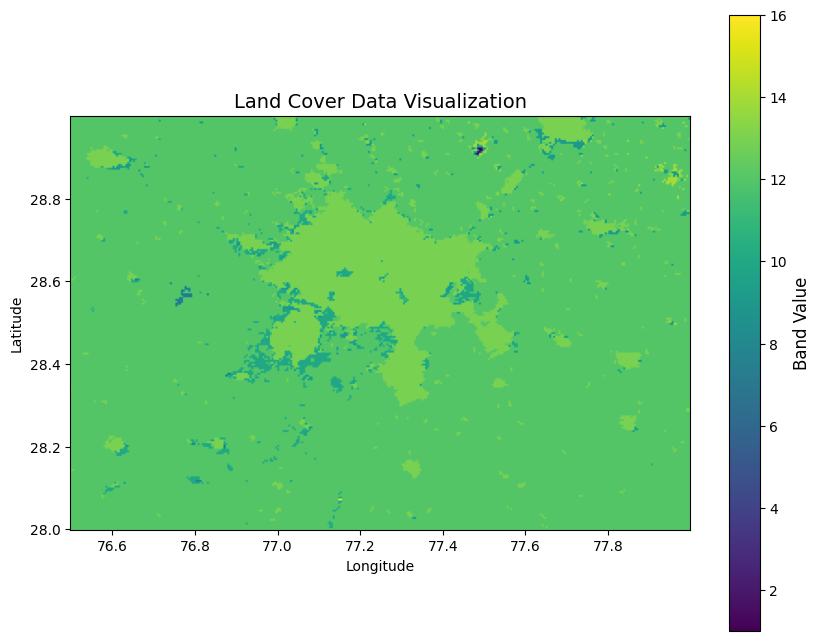

In [3]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

# Load the raster file
filename = r'/content/drive/MyDrive/Data SIH1734/LC_MODIS_2020.tif'
fid = rio.open(filename)
data = fid.read()
LC_type = list(fid.descriptions)

# Extract raster dimensions and coordinates
height = fid.shape[0]
width = fid.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
xs, ys = rio.transform.xy(fid.transform, rows, cols)
lons = np.array(xs)
lats = np.array(ys)

# Plotting the raster data
fig, ax = plt.subplots(figsize=(10, 8))

# Selecting the first band for visualization (modify for other bands as needed)
if len(data.shape) > 2:
    band_to_plot = data[0, :, :]
else:
    band_to_plot = data

# Plot the raster data with geographical coordinates
c = ax.imshow(band_to_plot, cmap='viridis', extent=(lons.min(), lons.max(), lats.min(), lats.max()))
ax.set_title('Land Cover Data Visualization', fontsize=14)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a colorbar
cbar = plt.colorbar(c, ax=ax, orientation='vertical')
cbar.set_label('Band Value', fontsize=12)

# Show the plot
plt.show()

# Cleanup
del height, width, cols, rows, xs, ys



In [52]:
import pandas as pd
import rasterio as rio
import numpy as np


# Read the GeoTIFF data
filename = r'/content/drive/MyDrive/Data SIH1734/Satellite_NO2_Delhi_2018_2024.tif'
fid = rio.open(filename)
data = fid.read() * 6.022141E19 / 1E15  # Scale the data
dates = list(fid.descriptions)  # Read band descriptions (dates)

# Get latitude and longitude
height = fid.shape[0]
width = fid.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
xs, ys = rio.transform.xy(fid.transform, rows, cols)
lons = np.array(xs).flatten()  # Flatten for DataFrame
lats = np.array(ys).flatten()

# Reshape the 3D data array into 2D (pixels, bands)
bands, height, width = data.shape
data_2d = data.reshape(bands, -1).T  # Shape: (pixels, bands)

# Repeat latitude and longitude for all bands
latitudes = np.tile(lats, bands)
longitudes = np.tile(lons, bands)

# Repeat dates for each pixel
dates_repeated = np.repeat(dates, len(lats))

# Flatten data for all bands
values = data_2d.flatten()

# Create the DataFrame
df = pd.DataFrame({
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Date': dates_repeated,
    'Value': values
})

# Display the first few rows
print(df.head())

# Save to CSV if needed
# df.to_csv('output_dataframe.csv', index=False)


    Latitude  Longitude  Date     Value
0  29.002109  76.496038  None  1.792373
1  29.002109  76.505021  None  1.809139
2  29.002109  76.514004  None  1.810583
3  29.002109  76.522987  None  1.810583
4  29.002109  76.531971  None  1.810583


In [53]:
df.head()

,Latitude,Longitude,Date,Value
0,29.002109,76.496038,None,1.792373
1,29.002109,76.505021,None,1.809139
2,29.002109,76.514004,None,1.810583
3,29.002109,76.522987,None,1.810583
4,29.002109,76.531971,None,1.810583


In [54]:
df.tail()

,Latitude,Longitude,Date,Value
18979,27.995996,77.960292,None,NaN
18980,27.995996,77.969275,None,NaN
18981,27.995996,77.978258,None,NaN
18982,27.995996,77.987241,None,NaN
18983,27.995996,77.996225,None,NaN


In [55]:
df.describe()

,Latitude,Longitude,Value
count,18984.000000,18984.000000,3568.000000
mean,28.499052,77.246131,2.354926
std,0.293029,0.435664,0.474835
min,27.995996,76.496038,1.113878
25%,28.247524,76.871085,1.974712
50%,28.499052,77.246131,2.357534
75%,28.750581,77.621178,2.678160
max,29.002109,77.996225,3.589206


In [56]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Date,18984
Value,15416


In [ ]:
df['Value'] = df['Value'].fillna(method='ffill')

<ipython-input-12-b769e7f77247>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Value'] = df['Value'].fillna(method='ffill')


In [ ]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Date,0
Value,0


In [ ]:
# Convert 'Date' column to datetime objects


# Extract the date part using string manipulation
df['Date'] = df['Date'].str.extract(r'(\d{4}-\d{2}-\d{2})', expand=False)

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

Resolution: (0.008983152841195215, 0.008983152841195215)
CRS: EPSG:4326
Number of Bands: 2191
Band Descriptions: ['0_2018-07-01', '1_2018-07-02', '2_2018-07-03', '3_2018-07-04', '4_2018-07-05', '5_2018-07-06', '6_2018-07-07', '7_2018-07-08', '8_2018-07-09', '9_2018-07-10', '10_2018-07-11', '11_2018-07-12', '12_2018-07-13', '13_2018-07-14', '14_2018-07-15', '15_2018-07-16', '16_2018-07-17', '17_2018-07-18', '18_2018-07-19', '19_2018-07-20', '20_2018-07-21', '21_2018-07-22', '22_2018-07-23', '23_2018-07-24', '24_2018-07-25', '25_2018-07-26', '26_2018-07-27', '27_2018-07-28', '28_2018-07-29', '29_2018-07-30', '30_2018-07-31', '31_2018-08-01', '32_2018-08-02', '33_2018-08-03', '34_2018-08-04', '35_2018-08-05', '36_2018-08-06', '37_2018-08-07', '38_2018-08-08', '39_2018-08-09', '40_2018-08-10', '41_2018-08-11', '42_2018-08-12', '43_2018-08-13', '44_2018-08-14', '45_2018-08-15', '46_2018-08-16', '47_2018-08-17', '48_2018-08-18', '49_2018-08-19', '50_2018-08-20', '51_2018-08-21', '52_2018-08-

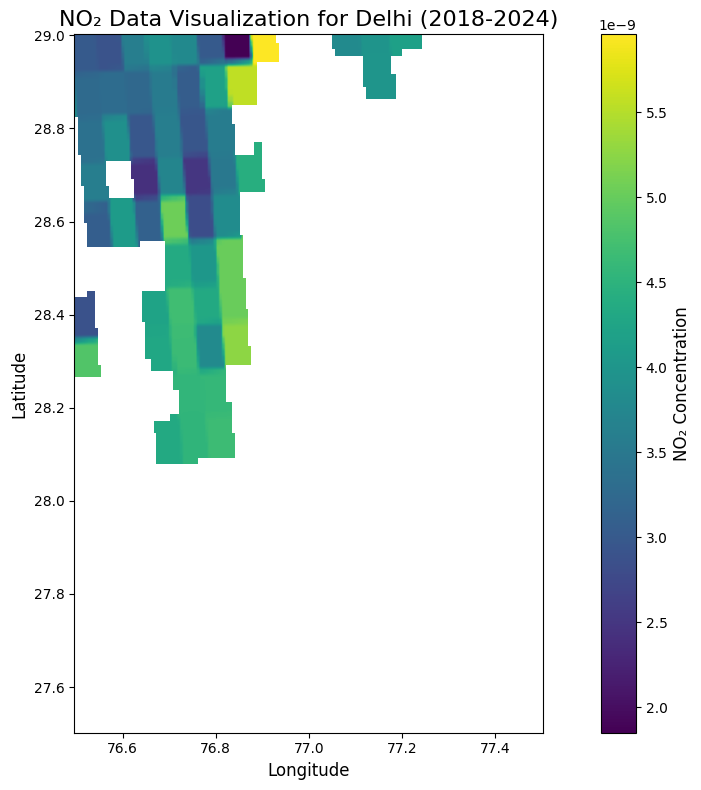

In [ ]:
!pip install rasterio
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

# Load the GeoTIFF file
filename = '/content/drive/MyDrive/Data SIH1734/Satellite_NO2_Delhi_2018_2024.tif'
with rio.open(filename) as fid:
    # Read the raster data
    data = fid.read() * 0.0001  # Scaling factor for NO₂ data
    lons, lats = rio.transform.xy(fid.transform, *np.meshgrid(np.arange(fid.width), np.arange(fid.height)))
    lons, lats = np.array(lons), np.array(lats)
    resolution = fid.res
    crs = fid.crs
    print(f"Resolution: {resolution}")
    print(f"CRS: {crs}")
    print(f"Number of Bands: {fid.count}")
    print(f"Band Descriptions: {list(fid.descriptions)}")

# Choose the first band for visualization
band_to_plot = data[0] if data.ndim > 2 else data

# Plot the raster data
fig, ax = plt.subplots(figsize=(12, 8))
c = ax.imshow(band_to_plot, cmap='viridis', extent=(lons.min(), lons.max(), lats.min(), lats.max()))
ax.set_title('NO₂ Data Visualization for Delhi (2018-2024)', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Add a color bar
cbar = plt.colorbar(c, ax=ax, orientation='vertical')
cbar.set_label('NO₂ Concentration', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [57]:
import rasterio
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Define the U-Net architecture
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 1, kernel_size=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load the TIFF file
def load_tif_file(file_path):
    with rasterio.open(file_path) as src:
        data = src.read(1)  # Read the first band
        return data

# Downscale the image using the U-Net model
def downscale_image(model, data):
    data = torch.from_numpy(data).unsqueeze(0).unsqueeze(0).float()  # Add batch and channel dimensions
    with torch.no_grad():
        output = model(data)
    return output.squeeze(0).squeeze(0).numpy()  # Remove batch and channel dimensions

# Save the downscaling images
def save_downscaling_images(data, file_path, model):
    scale_factors = [0.5, 0.25, 0.1]
    for scale_factor in scale_factors:
        # Resize the input data
        new_height = int(data.shape[0] * scale_factor)
        new_width = int(data.shape[1] * scale_factor)
        resized_data = np.resize(data, (new_height, new_width))

        # Downscale using the model
        downscaled_data = downscale_image(model, resized_data)

        # Save the downscaled image
        with rasterio.open(
            file_path + f"_downscaled_{scale_factor}.tif",
            "w",
            driver="GTiff",
            height=downscaled_data.shape[0],
            width=downscaled_data.shape[1],
            count=1,
            dtype=downscaled_data.dtype,
            crs="EPSG:4326",
        ) as dst:
            dst.write(downscaled_data, 1)

# Main function
def main():
    file_path = "/content/drive/MyDrive/Data SIH1734/Satellite_NO2_Delhi_2018_2024.tif"

    # Load the TIFF file
    data = load_tif_file(file_path)

    # Initialize the U-Net model
    model = UNet()

    # Load a pre-trained model if available
    # model.load_state_dict(torch.load('path_to_your_model.pth'))
    # model.eval()  # Set the model to evaluation mode

    # Save downscaled images
    save_downscaling_images(data, file_path, model)

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:366: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


In [58]:
import pandas as pd
import rasterio as rio
import numpy as np


# Read the GeoTIFF data
filename = r'/content/drive/MyDrive/Data SIH1734/Satellite_NO2_Delhi_2018_2024.tif_downscaled_0.1.tif'
fid = rio.open(filename)
data = fid.read() * 6.022141E19 / 1E15  # Scale the data
dates = list(fid.descriptions)  # Read band descriptions (dates)

# Get latitude and longitude
height = fid.shape[0]
width = fid.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
xs, ys = rio.transform.xy(fid.transform, rows, cols)
lons = np.array(xs).flatten()  # Flatten for DataFrame
lats = np.array(ys).flatten()

# Reshape the 3D data array into 2D (pixels, bands)
bands, height, width = data.shape
data_2d = data.reshape(bands, -1).T  # Shape: (pixels, bands)

# Repeat latitude and longitude for all bands
latitudes = np.tile(lats, bands)
longitudes = np.tile(lons, bands)

# Repeat dates for each pixel
dates_repeated = np.repeat(dates, len(lats))

# Flatten data for all bands
values = data_2d.flatten()

# Create the DataFrame
df = pd.DataFrame({
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Date': dates_repeated,
    'Value': values
})

# Display the first few rows
print(df.head())

# Save to CSV if needed
# df.to_csv('output_dataframe.csv', index=False)


   Latitude  Longitude  Date  Value
0       0.5        0.5  None    NaN
1       0.5        1.5  None    NaN
2       0.5        2.5  None    NaN
3       0.5        3.5  None    NaN
4       0.5        4.5  None    NaN


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Original Data Shape: (113, 168)
Normalized Data Shape: (113, 168)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 168, 1, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 84, 1, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 84, 1, 32)         4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 42, 1, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 42, 1, 64)         18496     
                                                      

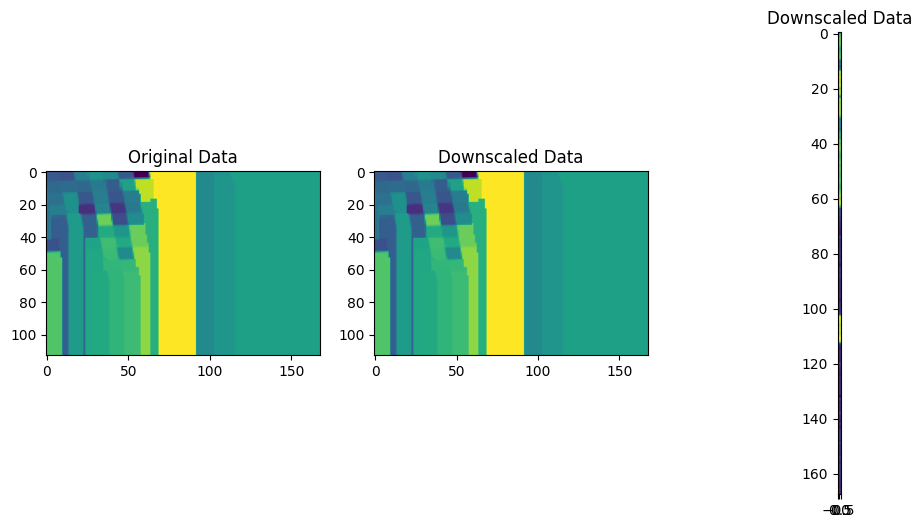

Downscaled Data Shape: (23, 168, 1)


In [65]:
import rasterio
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Read the .tif file
with rasterio.open('/content/drive/MyDrive/Data SIH1734/Satellite_NO2_Delhi_2018_2024.tif') as src:
    data = src.read(1)  # Reading the first band

# Ensure the data is in grid format
print("Original Data Shape:", data.shape)

# Step 2: Handle missing values using forward fill
df = pd.DataFrame(data)
df.ffill(axis=0, inplace=True)  # Fill along rows
df.ffill(axis=1, inplace=True)  # Fill along columns
data_filled = df.to_numpy()

# Step 3: Normalize the data (optional)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_filled)

# Ensure normalized data is in grid format
print("Normalized Data Shape:", normalized_data.shape)

# Step 4: Prepare the data for ML
normalized_data = normalized_data.reshape((normalized_data.shape[0], normalized_data.shape[1], 1))
X_train, X_test = train_test_split(normalized_data, test_size=0.2, random_state=42)

# Step 5: Define a simple CNN model for downscaling
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),  # Reduce dimensions with pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(X_train.shape[1] * X_train.shape[2], activation='linear'),  # Output should match the input size
    tf.keras.layers.Reshape((X_train.shape[1], X_train.shape[2]))
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Step 6: Train the model
model.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

# Step 7: Downscale the test data
downscaled_data = model.predict(X_test)
downscaled_data = downscaled_data.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Optional: Plot the original, filled, and downscaled data for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Data')
plt.imshow(data, cmap='viridis')
plt.subplot(1, 3, 2)
plt.title('Downscaled Data')
plt.imshow(data_filled, cmap='viridis')
plt.subplot(1, 3, 3)
plt.title('Downscaled Data')
plt.imshow(downscaled_data[0], cmap='viridis')
plt.show()

# Ensuring the output is in grid format
print("Downscaled Data Shape:", downscaled_data.shape)


Original Resolution in degrees: 0.008983152841195215 x -0.008983152841195215
Original Resolution in km: 0.88 km x 1.00 km
Original Data Shape: (113, 168)
Normalized Data Shape: (113, 168)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 168, 1, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 84, 1, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 84, 1, 32)         4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 42, 1, 32)         0         
 ng2D)                                                           
                                                                

1/1 [==============================] - 0s 83ms/step
Downscaled Data Shape: (23, 168, 1)
Downscaled Resolution in km: 147.48 km x 0.67 km


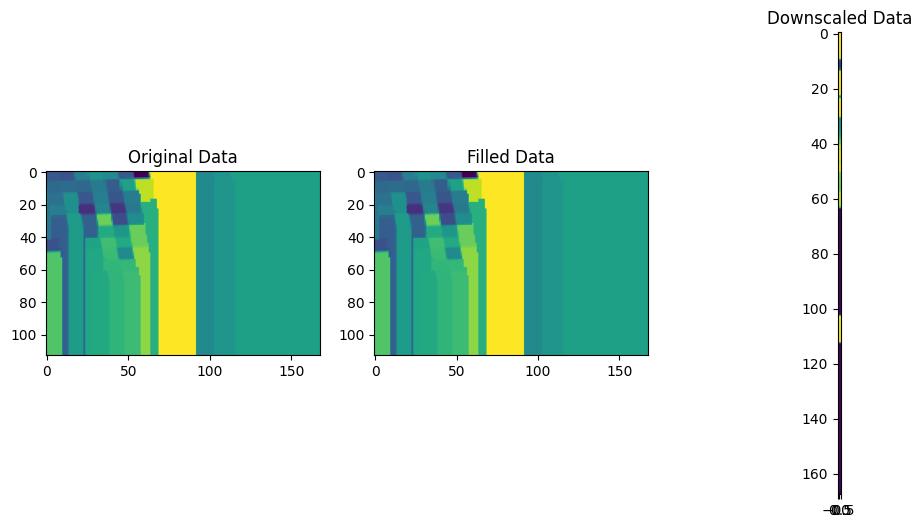

In [67]:
import rasterio
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Read the .tif file
file_path = '/content/drive/MyDrive/Data SIH1734/Satellite_NO2_Delhi_2018_2024.tif'
with rasterio.open(file_path) as src:
    data = src.read(1)  # Reading the first band

    # Get the resolution in degrees
    transform = src.transform
    resolution_x = transform[0]
    resolution_y = transform[4]

# Convert resolution from degrees to kilometers (approx.)
# 1 degree of latitude = ~111.32 km (approximately constant), longitude varies with latitude
lat_km_per_degree = 111.32
lon_km_per_degree = 111.32 * np.cos(np.radians(28.6139))  # Approximate latitude for Delhi

resolution_x_km = resolution_x * lon_km_per_degree
resolution_y_km = abs(resolution_y) * lat_km_per_degree

print(f"Original Resolution in degrees: {resolution_x} x {resolution_y}")
print(f"Original Resolution in km: {resolution_x_km:.2f} km x {resolution_y_km:.2f} km")

# Ensure the data is in grid format
print("Original Data Shape:", data.shape)

# Step 2: Handle missing values using forward fill
df = pd.DataFrame(data)
df.ffill(axis=0, inplace=True)  # Fill along rows
df.ffill(axis=1, inplace=True)  # Fill along columns
data_filled = df.to_numpy()

# Step 3: Normalize the data (optional)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_filled)

# Ensure normalized data is in grid format
print("Normalized Data Shape:", normalized_data.shape)

# Step 4: Prepare the data for ML
normalized_data = normalized_data.reshape((normalized_data.shape[0], normalized_data.shape[1], 1))
X_train, X_test = train_test_split(normalized_data, test_size=0.2, random_state=42)

# Step 5: Define a simple CNN model for downscaling
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),  # Reduce dimensions with pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(X_train.shape[1] * X_train.shape[2], activation='linear'),  # Output should match the input size
    tf.keras.layers.Reshape((X_train.shape[1], X_train.shape[2]))
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Step 6: Train the model
model.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test))

# Step 7: Downscale the test data
downscaled_data = model.predict(X_test)
downscaled_data = downscaled_data.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Calculate the downscaled resolution
original_shape = data.shape
downscaled_shape = downscaled_data.shape[1:3]

downscaled_resolution_x_km = resolution_x_km * (original_shape[1] / downscaled_shape[1])
downscaled_resolution_y_km = resolution_y_km * (original_shape[0] / downscaled_shape[0])

print(f"Downscaled Data Shape: {downscaled_data.shape}")
print(f"Downscaled Resolution in km: {downscaled_resolution_x_km:.2f} km x {downscaled_resolution_y_km:.2f} km")

# Optional: Plot the original, filled, and downscaled data for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Data')
plt.imshow(data, cmap='viridis')
plt.subplot(1, 3, 2)
plt.title('Filled Data')
plt.imshow(data_filled, cmap='viridis')
plt.subplot(1, 3, 3)
plt.title('Downscaled Data')
plt.imshow(downscaled_data[0], cmap='viridis')
plt.show()


In [69]:
import rasterio
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Read the .tif file
file_path = '/content/drive/MyDrive/Data SIH1734/Satellite_NO2_Delhi_2018_2024.tif'
with rasterio.open(file_path) as src:
    data = src.read(1)  # Reading the first band

    # Get the resolution in degrees
    transform = src.transform
    resolution_x = transform[0]
    resolution_y = transform[4]

# Convert resolution from degrees to kilometers (approx.)
# 1 degree of latitude = ~111.32 km (approximately constant), longitude varies with latitude
lat_km_per_degree = 111.32
lon_km_per_degree = 111.32 * np.cos(np.radians(28.6139))  # Approximate latitude for Delhi

resolution_x_km = resolution_x * lon_km_per_degree
resolution_y_km = abs(resolution_y) * lat_km_per_degree

print(f"Original Resolution in degrees: {resolution_x} x {resolution_y}")
print(f"Original Resolution in km: {resolution_x_km:.2f} km x {resolution_y_km:.2f} km")

# Ensure the data is in grid format
print("Original Data Shape:", data.shape)

# Step 2: Handle missing values using forward fill
df = pd.DataFrame(data)
df.ffill(axis=0, inplace=True)  # Fill along rows
df.ffill(axis=1, inplace=True)  # Fill along columns
data_filled = df.to_numpy()

# Step 3: Normalize the data (optional)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_filled)

# Ensure normalized data is in grid format
print("Normalized Data Shape:", normalized_data.shape)

# Step 4: Prepare the data for ML
normalized_data = normalized_data.reshape((normalized_data.shape[0], normalized_data.shape[1], 1))
X_train, X_test = train_test_split(normalized_data, test_size=0.2, random_state=42)

# Step 5: Define a simple CNN model for downscaling
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),  # Reduce dimensions with pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(X_train.shape[1] * X_train.shape[2], activation='linear'),  # Output should match the input size
    tf.keras.layers.Reshape((X_train.shape[1], X_train.shape[2]))
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Step 6: Train the model
model.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test))

# Step 7: Downscale the test data
downscaled_data = model.predict(X_test)
downscaled_data = downscaled_data.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Calculate the downscaled resolution
original_shape = data.shape
downscaled_shape = downscaled_data.shape[1:3]

downscaled_resolution_x_km = resolution_x_km * (original_shape[1] / downscaled_shape[1])
downscaled_resolution_y_km = resolution_y_km * (original_shape[0] / downscaled_shape[0])

print(f"Downscaled Data Shape: {downscaled_data.shape}")
print(f"Downscaled Resolution in km: {downscaled_resolution_x_km:.2f} km x {downscaled_resolution_y_km:.2f} km")

# Optional: Plot the original, filled, and downscaled data for comparison
plt.figure(figsize=(12, 6))
plt.subplot

Original Resolution in degrees: 0.008983152841195215 x -0.008983152841195215
Original Resolution in km: 0.88 km x 1.00 km
Original Data Shape: (113, 168)
Normalized Data Shape: (113, 168)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 168, 1, 16)        160       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 84, 1, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 84, 1, 32)         4640      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 42, 1, 32)         0         
 ng2D)                                                           
                                                                

1/1 [==============================] - 0s 105ms/step
Downscaled Data Shape: (23, 168, 1)
Downscaled Resolution in km: 147.48 km x 0.67 km


<function matplotlib.pyplot.subplot(*args, **kwargs) -> 'Axes'>

<Figure size 1200x600 with 0 Axes>

NEW APPROACH


In [ ]:
import rasterio
import numpy as np
import pandas as pd
from skimage.transform import resize

# Load the TIFF image
def load_tiff_image(file_path):
    with rasterio.open(file_path) as src:
        img = src.read(1)  # Read the first band (assuming grayscale)
        img = img.astype(np.float32)
    return img

# Forward fill missing values
def forward_fill(image):
    # Assuming image has missing values represented by NaN
    df = pd.DataFrame(image)
    df.ffill(axis=1, inplace=True)
    df.bfill(axis=1, inplace=True)
    return df.values

# Load and preprocess image
image_path = '/content/drive/MyDrive/Data SIH1734/Satellite_NO2_Delhi_2018_2024.tif'
image = load_tiff_image(image_path)
image = forward_fill(image)

# Rescale the image (1km → 100m)
def rescale_image(image, target_resolution=(100, 100)):
    return resize(image, target_resolution, mode='reflect', anti_aliasing=True)

# Rescale the image to 100m resolution
downscaled_image = rescale_image(image, target_resolution=(100, 100))


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN model architecture
def create_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))

    # Convolutional layers
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))

    # Upsampling layers
    model.add(layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    # Output layer
    model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return model

# Model input shape (based on image size)
input_shape = (downscaled_image.shape[0], downscaled_image.shape[1], 1)

# Create the CNN model
model = create_cnn_model(input_shape)

# Train the model
X_train = np.expand_dims(downscaled_image, axis=-1)  # Add channel dimension
Y_train = X_train  # Assuming you have ground truth high-res images for Y_train

model.fit(X_train, Y_train, epochs=10, batch_size=16)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define a two-layer fully connected neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First layer with 64 neurons
    Dense(32, activation='relu'),  # Second layer with 32 neurons
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")


NameError: name 'X_train' is not defined